In [ ]:
import pendulum
from echo_state_network import ESN
import numpy as np
import matplotlib.pyplot as plt

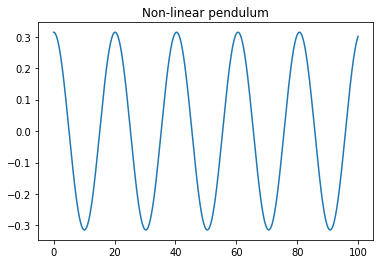

In [15]:
time = np.arange(0, 100, 0.01)
angle = pendulum.theta(time)


plt.plot(time, angle)
plt.title('Non-linear pendulum')
plt.xlabel('time[s]')
plt.ylabel('angle[rad]')

cutoff = int(len(time) * 0.8)

training_input = time[0:cutoff]
training_output = angle[0:cutoff]

validation_input = time[cutoff:]
validation_output = angle[cutoff:]

Computing error vs reservoir dependence might take a while


Text(0.5, 1.0, 'Reservoir size vs error')

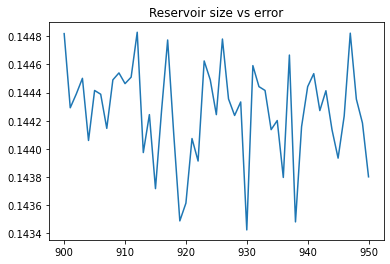

In [23]:
weights = []
losses = []
sizes = [n for n in range(900, 951)]

print('Computing error vs reservoir dependence might take a while')

for n in sizes:
    esn = ESN(1, 1, n_reservoir=n)
    weights.append(esn.fit(training_input, training_output))
    results = esn.predict(validation_input)[0]
    
    loss = (results - validation_output) ** 2
    losses.append(loss.mean())

plt.plot(sizes, losses)
plt.title('Reservoir size vs error')

In [42]:
#Making actual predictions on data

lowest_index = np.argmin(losses)
optimal_esn = ESN(1, 1, 10000)

optimal_esn.fit(training_input, training_output)

print(lowest_index, 'LOWEST INDEX')

KeyboardInterrupt: 

In [ ]:
predictions = optimal_esn.predict(validation_input)
plt.plot(validation_input, predictions, validation_input, validation_output)